# Simple neural network

Add dependency

In [210]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline

## Set the network shape

In [211]:
I = 3
H = 4
O = 1

## Define sigmoid function and its derivative

In [212]:
def sigmoid(x, deriv=False):
    if deriv:
        res = sigmoid(x)
        return res * (1 - res)
    else:
        return 1/(1+np.exp(-x))

Check these functions

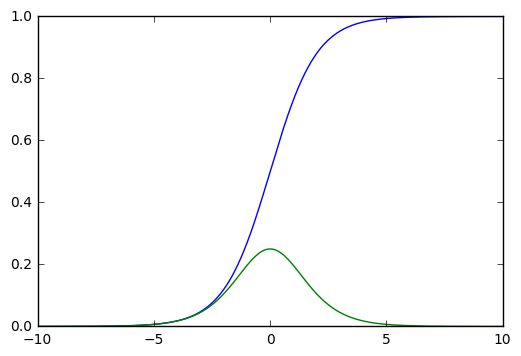

In [213]:
x=np.linspace(-10,10,1000)
plt.plot(x,sigmoid(x))
plt.plot(x,sigmoid(x,True))

## Define the network

Define the random seed

In [214]:
 np.random.seed(0)

Define synapses 

In [215]:
input_synapses = 2 *np.random.random((I,H)) - 1
output_synapses = 2 * np.random.random((H,O)) - 1

## Choosing input and desired output

Input : all 3-boolean variables combinations

In [216]:
x = np.array(
[[0, 0, 0],
[0, 0, 1],
[0, 1, 0],
[0, 1, 1],
[1, 0, 0],
[1, 0, 1],
[1, 1, 0],
[1, 1, 1]]
)

Output function : having exactly 1 or 3 input variables set as True

In [217]:
y = np.array(
[[0],
[1], 
[1], 
[0], 
[1], 
[0], 
[0],            
[1]]
)

## Training

Choose the number of iterations

In [218]:
N = 50000

Back propagation

In [219]:
error = [0]*N
for i in range(N):
    # input layer
    input_layer = x
    # hidden layer
    hidden_layer = sigmoid(np.dot(input_layer,input_synapses))
    # output layer
    output_layer = sigmoid(np.dot(hidden_layer,output_synapses))
    
    #back propagation
    output_error = y - output_layer
    error[i] = np.mean(np.abs(output_error))
    if ((i+1) % 10000) == 0:
        print(str(100 * (i+1) / N)  + '%' + ' : error = ' + str(100 * np.mean(np.abs(output_error))) + '%')
    output_layer_loss_function = output_error * sigmoid(output_layer,deriv=True)
    
    hidden_error = output_layer_loss_function.dot(output_synapses.T)
    hidden_layer_loss_function = hidden_error * sigmoid(hidden_layer,deriv=True)
    
    output_synapses += hidden_layer.T.dot(output_layer_loss_function)
    input_synapses += input_layer.T.dot(hidden_layer_loss_function)   
    

20.0% : error = 50.0017509392%
40.0% : error = 49.9855308874%
60.0% : error = 2.27455765231%
80.0% : error = 0.460340974345%
100.0% : error = 0.256632084852%


Plot the error

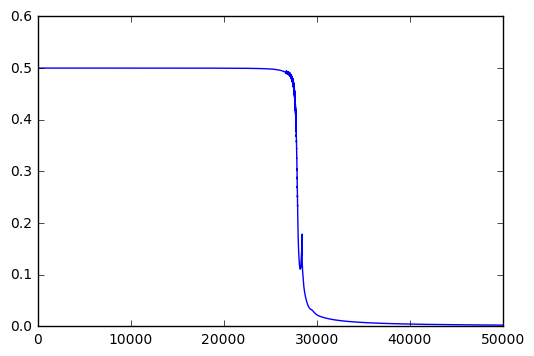

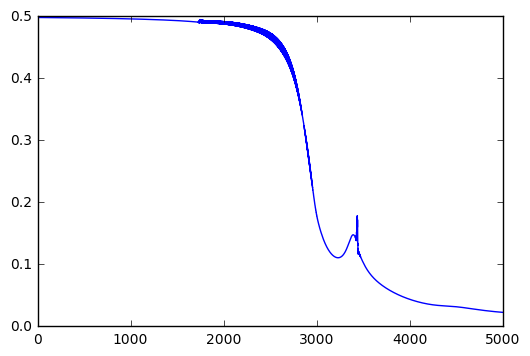

In [225]:
plt.plot(error)
plt.figure()
plt.plot(error[25000:30000])

In [226]:
np.set_printoptions(suppress=True,precision=3)
print('Input | Final output | Desired output :')
print(np.concatenate((output_layer,y),axis=1))

Input | Final output | Desired output :
[[ 0.006  0.   ]
 [ 0.998  1.   ]
 [ 0.998  1.   ]
 [ 0.     0.   ]
 [ 0.995  1.   ]
 [ 0.002  0.   ]
 [ 0.002  0.   ]
 [ 0.999  1.   ]]
